Space Weather Data statistics w.r.t. peaking of activity (above certain thresholds) by month

In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as pl
import seaborn as sb
import matplotlib.colors as mcolors
from calendar import month_name
import numpy as np
import warnings
from IPython.display import Image
import math as m
import pandas as pd
#import matplotlib as plt
%matplotlib notebook 
import numpy as np
import scipy as sp
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
import datetime as dt
import statsmodels.api as sm

In [2]:
data = pd.read_csv('SpaceWeatherDataHourly.txt', delim_whitespace = True, header = 8)

In [3]:
data.columns =["Year", "DOY", "Hr", "Kp", "R", "DST", "AE", "pFlux30", "pFlux60"]

In [4]:
data

,Year,DOY,Hr,Kp,R,DST,AE,pFlux30,pFlux60
0,1999,1,0,3,89,-7,20,99999.99,99999.99
1,1999,1,1,3,89,-4,19,99999.99,99999.99
2,1999,1,2,3,89,-4,20,0.54,0.44
3,1999,1,3,27,89,-8,56,0.54,0.43
4,1999,1,4,27,89,-8,43,0.57,0.46
5,1999,1,5,27,89,-5,103,0.55,0.44
6,1999,1,6,10,89,-4,33,0.55,0.43
7,1999,1,7,10,89,-1,35,0.59,0.47
8,1999,1,8,10,89,3,42,0.54,0.44
9,1999,1,9,13,89,3,95,0.56,0.43


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140256 entries, 0 to 140255
Data columns (total 9 columns):
Year       140256 non-null int64
DOY        140256 non-null int64
Hr         140256 non-null int64
Kp         140256 non-null int64
R          140256 non-null int64
DST        140256 non-null int64
AE         140256 non-null int64
pFlux30    140256 non-null float64
pFlux60    140256 non-null float64
dtypes: float64(2), int64(7)
memory usage: 9.6 MB


Data looks correctly ingested.  Some of the Proton Flux numbers are off-scale high (= 99999.99), but
we don't have to worry about this data yet.  Only looking at Kp - AE columns.

Rather than convert each Year, DOY, Hr to datetime format, I'll just use the panda date_range function to generate the timestamps.  This assumes that there's no missing data rows.  Let's do a rough check: First entry is 1/1/1999; Last entry is 12/31/2014 -- 16 years with 4 leap days.  One entry every hour, so (16x365+4)x24 = 140256.  The same number of rows in the file (see above).  So it's not unreasonable to generate the timestamps.

After timestamps are generated, I'll need to index data on the datetime data.

In [6]:
ts = pd.date_range(pd.datetime(1999,1,1,0,0,0), pd.datetime(2014,12,31,23,0,0), freq='H')

In [7]:
data.index = ts

In [8]:
# Add a column for the month number; I'll need this later
data['Month'] = data.index.month

In [9]:
# Add a column for a Month-Year value, MMYYYY; This can be used later to uniquely sort events that 
# reoccur in the same month;
data['MYValue'] = data.index.year + data.index.month *10000

In [10]:
data

,Year,DOY,Hr,Kp,R,DST,AE,pFlux30,pFlux60,Month,MYValue
1999-01-01 00:00:00,1999,1,0,3,89,-7,20,99999.99,99999.99,1,11999
1999-01-01 01:00:00,1999,1,1,3,89,-4,19,99999.99,99999.99,1,11999
1999-01-01 02:00:00,1999,1,2,3,89,-4,20,0.54,0.44,1,11999
1999-01-01 03:00:00,1999,1,3,27,89,-8,56,0.54,0.43,1,11999
1999-01-01 04:00:00,1999,1,4,27,89,-8,43,0.57,0.46,1,11999
1999-01-01 05:00:00,1999,1,5,27,89,-5,103,0.55,0.44,1,11999
1999-01-01 06:00:00,1999,1,6,10,89,-4,33,0.55,0.43,1,11999
1999-01-01 07:00:00,1999,1,7,10,89,-1,35,0.59,0.47,1,11999
1999-01-01 08:00:00,1999,1,8,10,89,3,42,0.54,0.44,1,11999
1999-01-01 09:00:00,1999,1,9,13,89,3,95,0.56,0.43,1,11999


The data looks correctly indexed on date-time stamps.  First and last 20+ rows have index that matches Year, DOY columns.

To establish an exceedance threshold for each type of data, I'll bin the data points and look for the data value that exceeds a threshold percentage (like 90% or 95% or 99%).  Then I can consider those months where the data exceed this threshold data value.

Before binning and searching, I want to make a plot of the data to get a visual feel for it.  But plotting doesn't seem to be working on my system (or I'm not using it properly).  So write the data to a csv file to plot in Excel. :-(

In [11]:
data.to_csv('SpaceWeather_indexed_data.csv')

# The Kp Data

While I worked in Excel, I binned and plotted the Kp data, and created a cumulative percentage graph.  I thought the data looks like maybe Poisson distributed or Chi-squarred and briefly messed around with trying to fit some parameters to it.  But the Poisson tail is too light and the Chi-squarred is too heavy.  Just going with the original 90% threshold concept.

Also, the data is quantized on values ending 0, 3, or 7, i.e. there are no Kp data ending with 1, 2, 4, 5, 6, 8, or 9.... hmmm.  Maybe Antii can explain this.

<img src="./Kp_Binned_Cum_Pct_graphs.jpg" /img>

The 90% threshold value is about 37.  Excel graph seems to right justify the drop line, but the data table clearly shows 37 as 0.912.  I should reproduce this in Python...

In [12]:
# Get frequency counts for the Kp data. The Kp data date/time index is dropped and the counts are
# normalized to produce percentage values, then the cumulative sum of the percentages is returned.
# Produces a series with data values as the index.
Kp_data = data['Kp'].reset_index(drop=True).value_counts(sort=False, normalize=True).cumsum()

In [13]:
Kp_data

0     0.073751
3     0.176848
7     0.286961
10    0.385973
13    0.477349
17    0.563099
20    0.645470
23    0.716034
27    0.777614
30    0.831579
33    0.877139
37    0.912389
40    0.938334
43    0.956772
47    0.970140
50    0.979338
53    0.985327
57    0.989926
60    0.993006
63    0.994909
67    0.996235
70    0.997241
73    0.998182
77    0.998866
80    0.999144
83    0.999529
87    0.999914
90    1.000000
Name: Kp, dtype: float64

In [14]:
# Swap the index and the percentage data -- easier to look up values using the index.
Kp_data = pd.Series(Kp_data.index.values, index=Kp_data)

In [15]:
# Find the data values close to the 90% threshold level
Kp_data[0.85:0.95]

Kp
0.877139    33
0.912389    37
0.938334    40
dtype: int64

This shows the 90% threshold data value as slightly less than 37.  This agrees with Excel.

In [16]:
# Find the 95% and 99% thresholds
Kp_data[0.93:0.97]

Kp
0.938334    40
0.956772    43
dtype: int64

95% threshold is just under 43.

In [17]:
Kp_data[0.98:0.995]

Kp
0.985327    53
0.989926    57
0.993006    60
0.994909    63
dtype: int64

99% threshold is just under 60.  Now to select dates where Kp is >= 37.

In [18]:
Kp_data = data.loc[data['Kp'] >= 37]
Kp_data

,Year,DOY,Hr,Kp,R,DST,AE,pFlux30,pFlux60,Month,MYValue
1999-01-08 09:00:00,1999,8,9,37,71,-8,453,0.55,0.45,1,11999
1999-01-08 10:00:00,1999,8,10,37,71,-2,156,0.56,0.45,1,11999
1999-01-08 11:00:00,1999,8,11,37,71,3,156,0.58,0.47,1,11999
1999-01-08 18:00:00,1999,8,18,40,71,-16,599,0.62,0.50,1,11999
1999-01-08 19:00:00,1999,8,19,40,71,-17,308,0.56,0.45,1,11999
1999-01-08 20:00:00,1999,8,20,40,71,-22,443,0.61,0.49,1,11999
1999-01-09 00:00:00,1999,9,0,37,65,-21,234,0.58,0.47,1,11999
1999-01-09 01:00:00,1999,9,1,37,65,-30,349,0.60,0.46,1,11999
1999-01-09 02:00:00,1999,9,2,37,65,-27,161,0.61,0.48,1,11999
1999-01-13 12:00:00,1999,13,12,40,57,-30,445,0.58,0.48,1,11999


In [19]:
pd.unique(Kp_data[['MYValue']].values.ravel())


array([ 11999,  21999,  31999,  41999,  51999,  61999,  71999,  81999,
        91999, 101999, 111999, 121999,  12000,  22000,  32000,  42000,
        52000,  62000,  72000,  82000,  92000, 102000, 112000, 122000,
        12001,  22001,  32001,  42001,  52001,  62001,  72001,  82001,
        92001, 102001, 112001, 122001,  12002,  22002,  32002,  42002,
        52002,  62002,  72002,  82002,  92002, 102002, 112002, 122002,
        12003,  22003,  32003,  42003,  52003,  62003,  72003,  82003,
        92003, 102003, 112003, 122003,  12004,  22004,  32004,  42004,
        52004,  62004,  72004,  82004,  92004, 102004, 112004, 122004,
        12005,  22005,  32005,  42005,  52005,  62005,  72005,  82005,
        92005, 102005, 112005, 122005,  12006,  22006,  32006,  42006,
        52006,  62006,  72006,  82006,  92006, 102006, 112006, 122006,
        12007,  22007,  32007,  42007,  52007,  62007,  72007,  82007,
        92007, 102007, 112007, 122007,  12008,  22008,  32008,  42008,
      

There's at least one 90% Exceedance in every month of the time period.  The 90% threshold isn't going to produce any useful results.  Will try 95% now.

In [20]:
Kp_data = data.loc[data['Kp'] >= 43]
Kp_data

,Year,DOY,Hr,Kp,R,DST,AE,pFlux30,pFlux60,Month,MYValue
1999-01-13 15:00:00,1999,13,15,53,57,-26,80,0.58,0.47,1,11999
1999-01-13 16:00:00,1999,13,16,53,57,-22,372,0.51,0.42,1,11999
1999-01-13 17:00:00,1999,13,17,53,57,-52,868,0.58,0.46,1,11999
1999-01-13 18:00:00,1999,13,18,57,57,-86,973,0.52,0.41,1,11999
1999-01-13 19:00:00,1999,13,19,57,57,-102,769,0.55,0.41,1,11999
1999-01-13 20:00:00,1999,13,20,57,57,-107,801,0.53,0.42,1,11999
1999-01-13 21:00:00,1999,13,21,70,57,-106,671,0.54,0.42,1,11999
1999-01-13 22:00:00,1999,13,22,70,57,-105,919,0.52,0.42,1,11999
1999-01-13 23:00:00,1999,13,23,70,57,-112,405,0.54,0.43,1,11999
1999-01-14 06:00:00,1999,14,6,50,90,-66,44,0.57,0.45,1,11999


In [21]:
pd.unique(Kp_data[['MYValue']].values.ravel())

array([ 11999,  21999,  31999,  41999,  51999,  61999,  71999,  81999,
        91999, 101999, 111999, 121999,  12000,  22000,  32000,  42000,
        52000,  62000,  72000,  82000,  92000, 102000, 112000, 122000,
        12001,  22001,  32001,  42001,  52001,  62001,  72001,  82001,
        92001, 102001, 112001, 122001,  12002,  22002,  32002,  42002,
        52002,  72002,  82002,  92002, 102002, 112002, 122002,  12003,
        22003,  32003,  42003,  52003,  62003,  72003,  82003,  92003,
       102003, 112003, 122003,  12004,  22004,  32004,  42004,  52004,
        62004,  72004,  82004,  92004, 102004, 112004, 122004,  12005,
        22005,  32005,  42005,  52005,  62005,  72005,  82005,  92005,
       102005, 112005, 122005,  12006,  22006,  32006,  42006,  52006,
        62006,  72006,  82006,  92006, 102006, 112006, 122006,  12007,
        22007,  32007,  42007,  52007,  62007,  72007,  82007,  92007,
       102007, 112007, 122007,  12008,  22008,  32008,  42008,  52008,
      

95% threshold only eliminated a few months beginning in 2009.  Still not very useful.  Try 99% level now.

In [22]:
Kp_data = data.loc[data['Kp'] >= 60]
Kp_data

,Year,DOY,Hr,Kp,R,DST,AE,pFlux30,pFlux60,Month,MYValue
1999-01-13 21:00:00,1999,13,21,70,57,-106,671,0.54,0.42,1,11999
1999-01-13 22:00:00,1999,13,22,70,57,-105,919,0.52,0.42,1,11999
1999-01-13 23:00:00,1999,13,23,70,57,-112,405,0.54,0.43,1,11999
1999-02-18 03:00:00,1999,49,3,60,155,2,415,0.53,0.41,2,21999
1999-02-18 04:00:00,1999,49,4,60,155,-47,781,0.49,0.39,2,21999
1999-02-18 05:00:00,1999,49,5,60,155,-55,972,0.51,0.40,2,21999
1999-02-18 06:00:00,1999,49,6,67,155,-55,626,0.48,0.37,2,21999
1999-02-18 07:00:00,1999,49,7,67,155,-73,793,0.48,0.39,2,21999
1999-02-18 08:00:00,1999,49,8,67,155,-106,1035,0.52,0.41,2,21999
1999-02-18 09:00:00,1999,49,9,67,155,-123,1148,0.50,0.40,2,21999


In [23]:
pd.unique(Kp_data[['MYValue']].values.ravel())

array([ 11999,  21999,  31999,  41999,  61999,  71999,  91999, 101999,
       111999,  12000,  22000,  42000,  52000,  62000,  72000,  82000,
        92000, 102000, 112000,  32001,  42001,  82001,  92001, 102001,
       112001,  22002,  32002,  42002,  52002,  82002,  92002, 102002,
       112002, 122002,  32003,  42003,  52003,  62003,  72003,  82003,
        92003, 102003, 112003,  12004,  22004,  32004,  42004,  72004,
        82004, 112004,  12005,  22005,  42005,  52005,  62005,  72005,
        82005,  92005,  32006,  42006,  72006,  82006, 112006, 122006,
        92008, 102008,  42010,  52010,  82010,  52011,  62011,  82011,
        92011, 102011,  32012,  42012,  62012,  72012, 102012, 112012,
        32013,  62013, 102013, 122013,  22014,  62014,  92014])

The 99% threshold filtered out a lot of months.  I want create frequency count of the months exceeding the 99% level.

In [24]:
# Transform the MYValue array into months
Kp_months = pd.unique(Kp_data[['MYValue']].values.ravel())

In [25]:
Kp_months = (Kp_months - np.mod(Kp_months,10000))/10000 

In [26]:
dftmp = pd.DataFrame(Kp_months).astype(int)

In [27]:
dftmp = dftmp[0].reset_index(drop=True).value_counts(sort=False, normalize=False)

In [28]:
dftmp

1      4
2      6
3      8
4     10
5      6
6      8
7      7
8      9
9      9
10     9
11     8
12     3
Name: 0, dtype: int64

Here's a graph of the above data.  These are the frequency counts for the months where the Kp data had at least one 99% exceedence.  87 out of 192 months, or about 0.45%, had an exceedance above the 99% threshold. 

<img src="./Kp_99pct_months.jpg" /img>



One idea was to next look at counting each exceedance in every month.  But exceedances that are in consecutive hours should count as one event.  This means carefully analyzing the data to recognize each excursion as a single event even if it spans multiple hours (or crosses month boundaries), then add up each event by Month-Year.

Another idea is to simply count the number of hours that the data have a particular value aggregated within a month.  For example, if there were 5 Kp=90 readings from the months: Mar '02, Jun '06, Mar '07, Jul '07 Mar '11, we would want to count Mar-90=3, Jun-90=1, Jul-90=1.

In addition, one could count the number of hours >= a Kp value, aggregated within a month.  This would allow us to select a threshold level and produce a monthly bar graph.

This seems to imply a double index scheme: column index 1 - 12 representing the month numbers, and row index 0 - 90 representing the Kp values.  (Recall that only Kp values ending in 0, 3, or 7 will have non-zero data.)

In [29]:
# An array used in the loop below for month numbers (1 - 12).
m_range = range(1,13,1)

In [30]:
# Loop over all Kp data values 
for i in range(91):
    
    # Select only data that matches the Kp value for this iteration
    Kp_data = data.loc[data['Kp'] == i]
    
    # Count the occurrences by month number, i.e. bin on months for this Kp value.
    Kp_bin = Kp_data['Month'].reset_index(drop=True).value_counts(sort=False, normalize=False);
    
    # Only months with non-zero data are retained from value_counts
    # Re-index with 0-fill to get complete set of month numbers.
    Kp_bin = Kp_bin.reindex(index=m_range,fill_value=0);
    
    # If this is the first iteration, establish the empty data frame where I collect all the counts.
    if i == 0:
        Kp_MonthAggByHour = pd.DataFrame(index=range(0,91,1),columns=m_range)
        
    # Assign the counts to the data frame with row index corresponding to the Kp value.
    Kp_MonthAggByHour.loc[i] = Kp_bin.values

In [31]:
Kp_MonthAggByHour

,1,2,3,4,5,6,7,8,9,10,11,12
0,1086,987,735,558,498,270,330,459,924,1185,1572,1740
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,1212,1008,1221,1167,1284,1197,1299,1269,1068,1254,1104,1377
4,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0
7,1254,1071,1329,1224,1356,1542,1500,1383,1191,1290,1062,1242
8,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0


Above is the Kp data frequency counts aggregated into months of the year.  Months are the column index; Kp values are row index.  Each value in the table represents the number of hours in the month where the Kp value was observed, between Jan 1, 1999 and Dec 31, 2014.

I'd like to make a plot of the data that shows seasonal variability.  Add the counts (by month) above the 99% threshold level (Kp = 60).  This filters out the counts below the threshold.  Then make a plot: Hours above threshold vs. Month.

In [38]:
Kp_HrsAbvThresh = Kp_MonthAggByHour.loc[60:].sum(axis=0)

In [39]:
Kp_HrsAbvThresh

1      63
2      48
3     111
4     156
5     117
6      78
7     162
8     114
9     132
10    234
11    177
12     21
dtype: int64

<IPython.core.display.Javascript object>


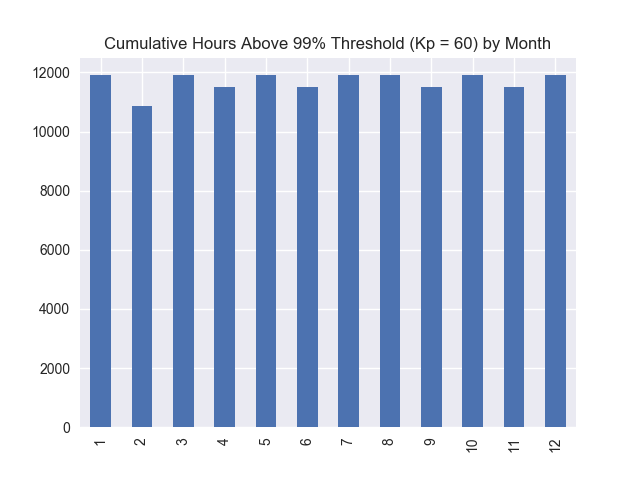

In [57]:
Kp_HrsAbvThresh.plot(kind='bar',title='Cumulative Hours Above 99% Threshold (Kp = 60) by Month')

<img src="./KpHrsAbove99pct.jpg" /img>

Just for GP, let's do another plot at the 90% threshold (Kp=37)...

In [42]:
Kp_HrsAbvThresh = Kp_MonthAggByHour.loc[37:].sum(axis=0);
Kp_HrsAbvThresh.plot(kind='bar',title='Cumulative Hours Above 90% Threshold (Kp = 37) by Month')

<img src="./KpHrsAbove90pct.jpg" /img>


Let's plot with no threshold (Kp = 0)

In [43]:
Kp_HrsAbvThresh = Kp_MonthAggByHour.loc[0:].sum(axis=0);
Kp_HrsAbvThresh.plot(kind='bar',title='Cumulative Hours No Theshold (Kp = 0) by Month')

<img src="./KpHrsAbove0pct.jpg" /img>

# The R Data - Sunspot Number

Let's produce the same data matrix for the R Data (counts indexed by data values and months).
The values appear to be whole numbers.

In [44]:
data['R'].max()

353

In [45]:
data['R'].idxmax()

Timestamp('2000-07-19 00:00:00', freq='H')

In [46]:
data['R'].min()

0

In [47]:
data['R'].idxmin()

Timestamp('2004-01-27 00:00:00', freq='H')

In [48]:
# Loop over all R data values 
for i in range(354):
    
    # Select only data that matches the R value for this iteration
    R_data = data.loc[data['R'] == i]
    
    # Count the occurrences by month number, i.e. bin on months for this R value.
    R_bin = R_data['Month'].reset_index(drop=True).value_counts(sort=False, normalize=False);
    
    # Only months with non-zero data are retained from value_counts
    # Re-index with 0-fill to get complete set of month numbers.
    R_bin = R_bin.reindex(index=m_range,fill_value=0);
    
    # If this is the first iteration, establish the empty data frame where I collect all the counts.
    if i == 0:
        R_MonthAggByHour = pd.DataFrame(index=range(0,354,1),columns=m_range)
        
    # Assign the counts to the data frame with row index corresponding to the R value.
    R_MonthAggByHour.loc[i] = R_bin.values

In [49]:
R_MonthAggByHour

,1,2,3,4,5,6,7,8,9,10,11,12
0,1272,1560,1776,1944,1464,1344,1560,1848,1704,2184,1488,1488
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,48,0,0,0,0
6,0,48,24,0,0,0,48,0,0,0,0,0
7,48,72,48,0,72,0,24,0,24,0,0,0
8,24,144,0,0,96,0,0,0,0,0,0,0
9,96,24,0,216,48,0,0,0,48,0,0,0


**
Interesting that 0 sunspots are observed regularly, but 1, 2, 3, and 4 sunspots were never observed.
**

Need to see where the 90%, 95%, and 99% thresholds are for the R data:

In [50]:
R_data = data['R'].reset_index(drop=True).value_counts(sort=False, normalize=True).cumsum()

In [51]:
R_data

0      0.139973
128    0.144079
129    0.146304
257    0.146646
130    0.150068
258    0.150582
131    0.153662
259    0.154346
132    0.158966
260    0.159138
5      0.159480
133    0.162902
261    0.163073
6      0.163929
134    0.167693
262    0.168207
7      0.170260
135    0.174196
263    0.174538
8      0.176420
136    0.178474
9      0.181554
137    0.185489
265    0.185832
10     0.190623
138    0.194387
266    0.194730
11     0.202430
139    0.206366
267    0.207050
         ...   
113    0.932067
241    0.932923
114    0.938056
242    0.938741
115    0.943703
243    0.944045
116    0.948323
244    0.949008
117    0.954141
245    0.954312
118    0.958248
246    0.958932
119    0.963723
247    0.964579
120    0.967488
248    0.967830
121    0.972621
249    0.972793
122    0.977242
250    0.977926
123    0.981177
251    0.981520
124    0.986311
252    0.987337
125    0.990589
253    0.990931
126    0.995380
254    0.996407
127    0.999829
255    1.000000
Name: R, dtype: float64

The sunspot counts seem to have two populations that account for about half of all the counts -- one that peaks at 255 sunspots, and one that peaks at 127 sunspots.  This must be from the solar cycle.

http://www.sws.bom.gov.au/Solar/1/6

Too much data to plot every hour value.  Need to select just one hour of each day, or average over the day, or average over the month...

Perhaps we need to have a rolling threshold... Not sure.  Need to talk to Antti.

In [52]:
# Swap values and index to make lookup easier
# R_data = pd.Series(R_data.index.values, index=R_data)

In [53]:
# Look for 90% threshold level
# R_data[0.85:0.95]